<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/Image_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

While reading Computer Vision and Machine Learning literature, you will see signal processing jargon that can be intimidating at times. Let us demystify a few of those terms here.

Image Patch: An image patch is simply a small (3x3, 5x5 … ) region of the image centered around a pixel.

Low Frequency Information : An image patch is said to have low frequency information if it is smooth and does not have a lot of texture.

High Frequency Information : An image patch is said to have high frequency information if it has a lot of texture (edges, corners etc.).

Low Pass Filtering : This is essentially image blurring / smoothing. It you blur an image, you smooth out the texture. As the name suggests, low pass filtering lets lower frequency information pass and blocks higher frequency information.

High Pass Filtering : This is essentially a sharpening and edge enhancement type of operation. As the name suggests, low frequency information is suppressed and high frequency information is preserved in high pass filtering.

In [2]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [25]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
shrpImgPath1=root_path+"/noisy_color_image.png"
shrpImgPath2=root_path+"/krishna.jpg"
shrpImgPath3=root_path+"/color_noise.jpg"
shrpImgPath4=root_path+"/color_salt_pepper.jpg"
shrpImgPath5=root_path+"/lena.jpeg"



matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:

shrpImg = cv2.imread(shrpImgPath1,1)
if (shrpImg.any() == None):
  print("Empty Image")

shrpImg1 = cv2.imread(shrpImgPath2,1)
if (shrpImg1.any() == None):
  print("Empty Image")

shrpImg2 = cv2.imread(shrpImgPath3,1)
if (shrpImg2.any() == None):
  print("Empty Image")

shrpImg3 = cv2.imread(shrpImgPath4,1)
if (shrpImg3.any() == None):
  print("Empty Image")

shrpImg4 = cv2.imread(shrpImgPath5,1)
if (shrpImg4.any() == None):
  print("Empty Image")

##Define a Box Filter. Box Filter is a low pass filter.i.e a smoothing filter. It is a local filter. Removes certain types of noise. It blurs the image.

blurring (average smoothing, Gaussian smoothing, median smoothing, etc.), edge detection (Laplacian, Sobel, Scharr, Prewitt, etc.), and sharpening — all of these operations are forms of hand-defined kernels that are specifically designed to perform a particular function.

In [7]:
kernel_size=3 ## A 3 x 3 size filter
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)/kernel_size**2
result1=cv2.filter2D(shrpImg, -1, kernel,delta=0,borderType=cv2.BORDER_DEFAULT )

Text(0.5, 1.0, 'Image with some noise removal')

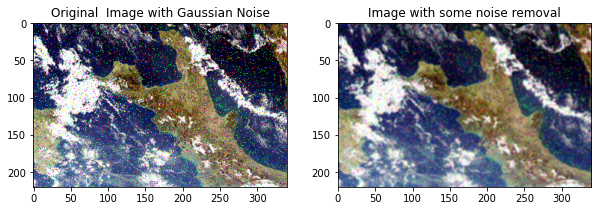

In [29]:
#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(shrpImg[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Original  Image with Gaussian Noise")
#ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(result[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Image with some noise removal")
#ax.axis('off')

Text(0.5, 1.0, 'Blurred Image')

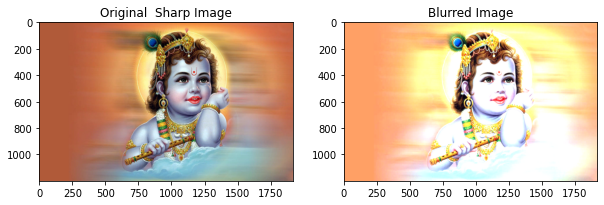

In [32]:
kernel_size1=4 ## A 4 x 4 size filter
kernel1 = np.ones((kernel_size1, kernel_size1), dtype=np.float32)/kernel_size**2
result2=cv2.filter2D(shrpImg1, -1, kernel1,delta=0,borderType=cv2.BORDER_DEFAULT )
#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(shrpImg1[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Original  Sharp Image")
#ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(result2[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Blurred Image")
#ax.axis('off')

### Box Blur
You can see that the noise can be reduced by increasing the kernel size. But at the same time, the image becomes more and more blurry.

Text(0.5, 1.0, 'Box Blur Result 2 : KernelSize = 15')

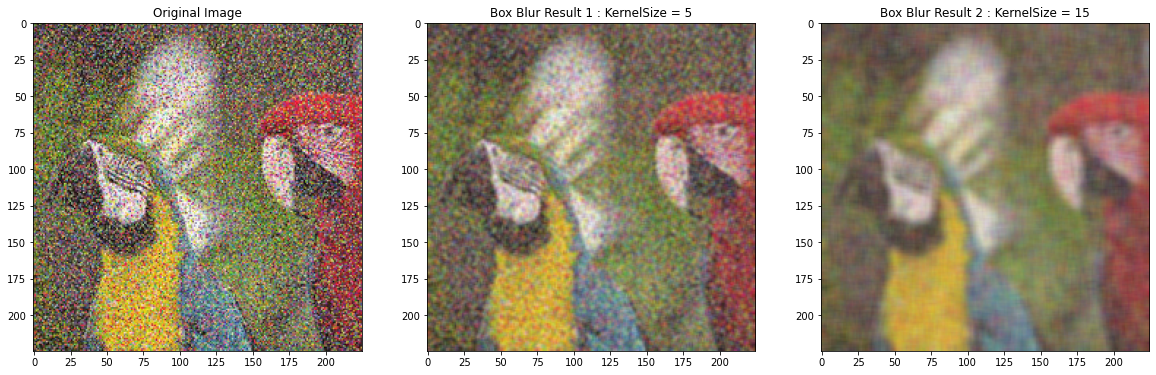

In [11]:
# Apply box filter - kernel size 3
dst1=cv2.blur(shrpImg2,(3,3),(-1,-1))

# Apply box filter - kernel size 7
dst2=cv2.blur(shrpImg2,(7,7),(-1,-1))

plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(shrpImg2[...,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Box Blur Result 1 : KernelSize = 5")
plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Box Blur Result 2 : KernelSize = 15")

### Gaussian Blur
In the following code, Gaussian blur is applied using two different kernels.

The first is a 5x5 kernel with sigmaX and sigmaY set to 0. OpenCV automatically calculates sigma when it is set to 0.

The second is a 25x25 kernel with sigmaX and sigmaY set to 50.

Also obvious that Guassian Blur does a better job in removing the noise compared to Box Blur (Averaging Blur)

Text(0.5, 1.0, 'Gaussian Blur Result 2 : KernelSize = 15')

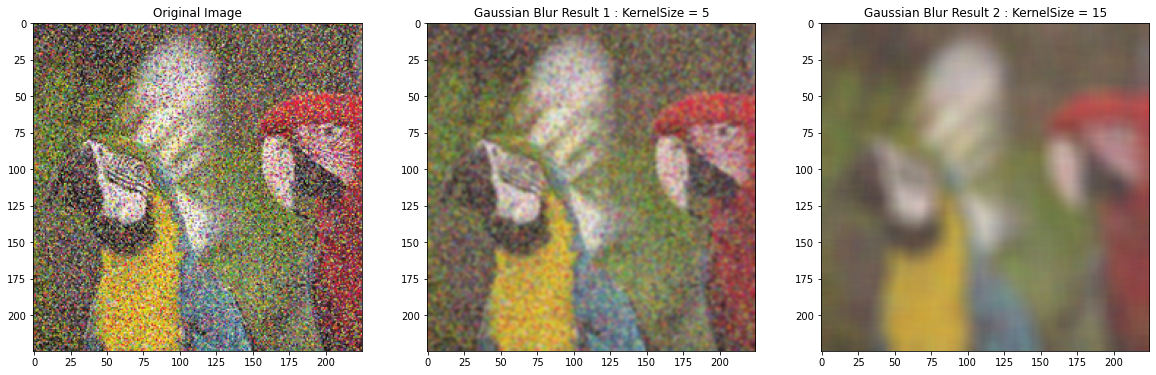

In [10]:
# Apply gaussian blur
dst1=cv2.GaussianBlur(shrpImg2,(5,5),0,0)
dst2=cv2.GaussianBlur(shrpImg2,(15,15),20,20)
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(shrpImg2[...,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Gaussian Blur Result 1 : KernelSize = 5")
plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Gaussian Blur Result 2 : KernelSize = 15")

***## Median Blur***

##Median blur filtering is a nonlinear filtering technique that is most commonly used to remove salt-and-pepper noise from images. As the name suggests, salt-and-pepper noise shows up as randomly occurring white and black pixels that are sharply different from the surrounding. In color images, salt-and-pepper noise may appear as small random color spots.

The illustration below shows three images.The image on the left is the noisy image that we wish to filter. In the center, we show the image filtered using a Gaussian filter and on the right, we show the image filtered using a Median Filter. Clearly, median blur filter performs better on salt-and-pepper noise.

In [14]:
# Defining the kernel size
kernelSize = 5

# Performing Median Blurring and store it in numpy array "medianBlurred"
medianBlurred = cv2.medianBlur(shrpImg3,kernelSize)
gaussianBlurred=cv2.GaussianBlur(shrpImg3,(5,5),0,0)

Text(0.5, 1.0, 'Gaussian Blur Result 2 : KernelSize = 5')

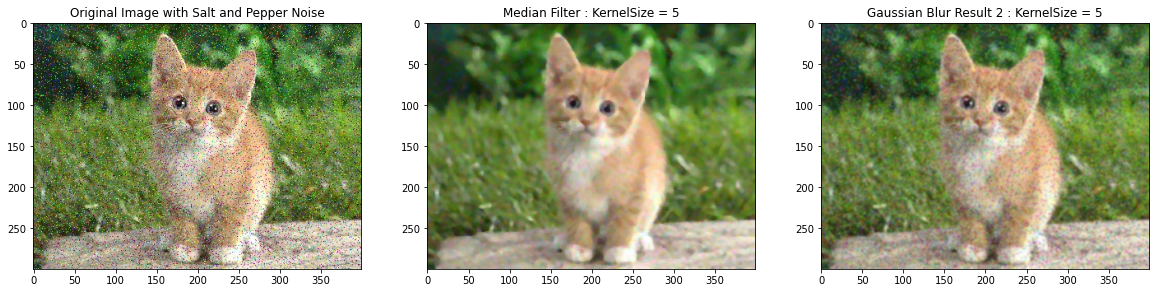

In [15]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(shrpImg3[...,::-1]);plt.title("Original Image with Salt and Pepper Noise")
plt.subplot(132);plt.imshow(medianBlurred[...,::-1]);plt.title("Median Filter : KernelSize = 5")
plt.subplot(133);plt.imshow(gaussianBlurred[...,::-1]);plt.title("Gaussian Blur Result 2 : KernelSize = 5")

##### As can be seen above, Median Filter does a better job of removing Salt and Pepper Noise. But image is blurred and has lost the sharpness

## Bilateral Filter

***Bilateral Filter is a noise reducing, edge preserving, non linear and smoothing filter***. It looks at Color Similarity (Distance in Color Intensity) and Spatial Closeness (Distance in Space). Achieved via Standard Gaussian Functions.

Bilateral Filter Best Works for Gaussian Noise and is Edge Preserving
Median Filter works best for Salt and Pepper Noise.

Gaussian Filter looks at Spatial Closeness only. Median Filter looks at Color Similarity. Bilateral Filter looks at both 

Text(0.5, 1.0, 'Bilateral Filter : Sigma Space=80 Sigma Color=80')

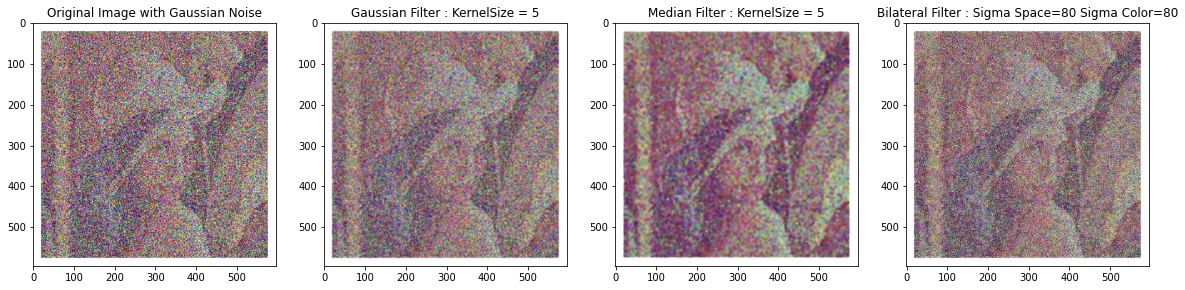

In [35]:
kernelSize = 7
d=15

# Larger the value the distant colours will be mixed together 
# to produce areas of semi equal colors
sigmaColor=120

# Larger the value more the influence of the farther placed pixels 
# as long as their colors are close enough
sigmaSpace=120

gaussianBlurred=cv2.GaussianBlur(shrpImg4,(5,5),0,0)
bilateralFiltered=cv2.bilateralFilter(shrpImg4,d,sigmaColor,sigmaSpace)
medianBlurred = cv2.medianBlur(shrpImg4,kernelSize)

plt.figure(figsize=[20,10])
plt.subplot(141);plt.imshow(shrpImg4[...,::-1]);plt.title("Original Image with Gaussian Noise")
plt.subplot(142);plt.imshow(gaussianBlurred[...,::-1]);plt.title("Gaussian Filter : KernelSize = 5")
plt.subplot(143);plt.imshow(medianBlurred[...,::-1]);plt.title("Median Filter : KernelSize = 5")
plt.subplot(144);plt.imshow(bilateralFiltered[...,::-1]);plt.title("Bilateral Filter : Sigma Space=80 Sigma Color=80")

## The following should be noted while deciding which filter to use for your problem :

Median filtering is the best way to smooth images which have salt-pepper type of noise (sudden high / low values in the neighborhood of a pixel).

Gaussian filtering can be used if there is low Gaussian noise.

Bilateral Filtering should be used if there is high level of Gaussian noise, and you want the edges intact while blurring other areas.

In terms of execution speed, Gaussian filtering is the fastest and Bilateral filtering is the slowest. ***bold text*** **bold text**